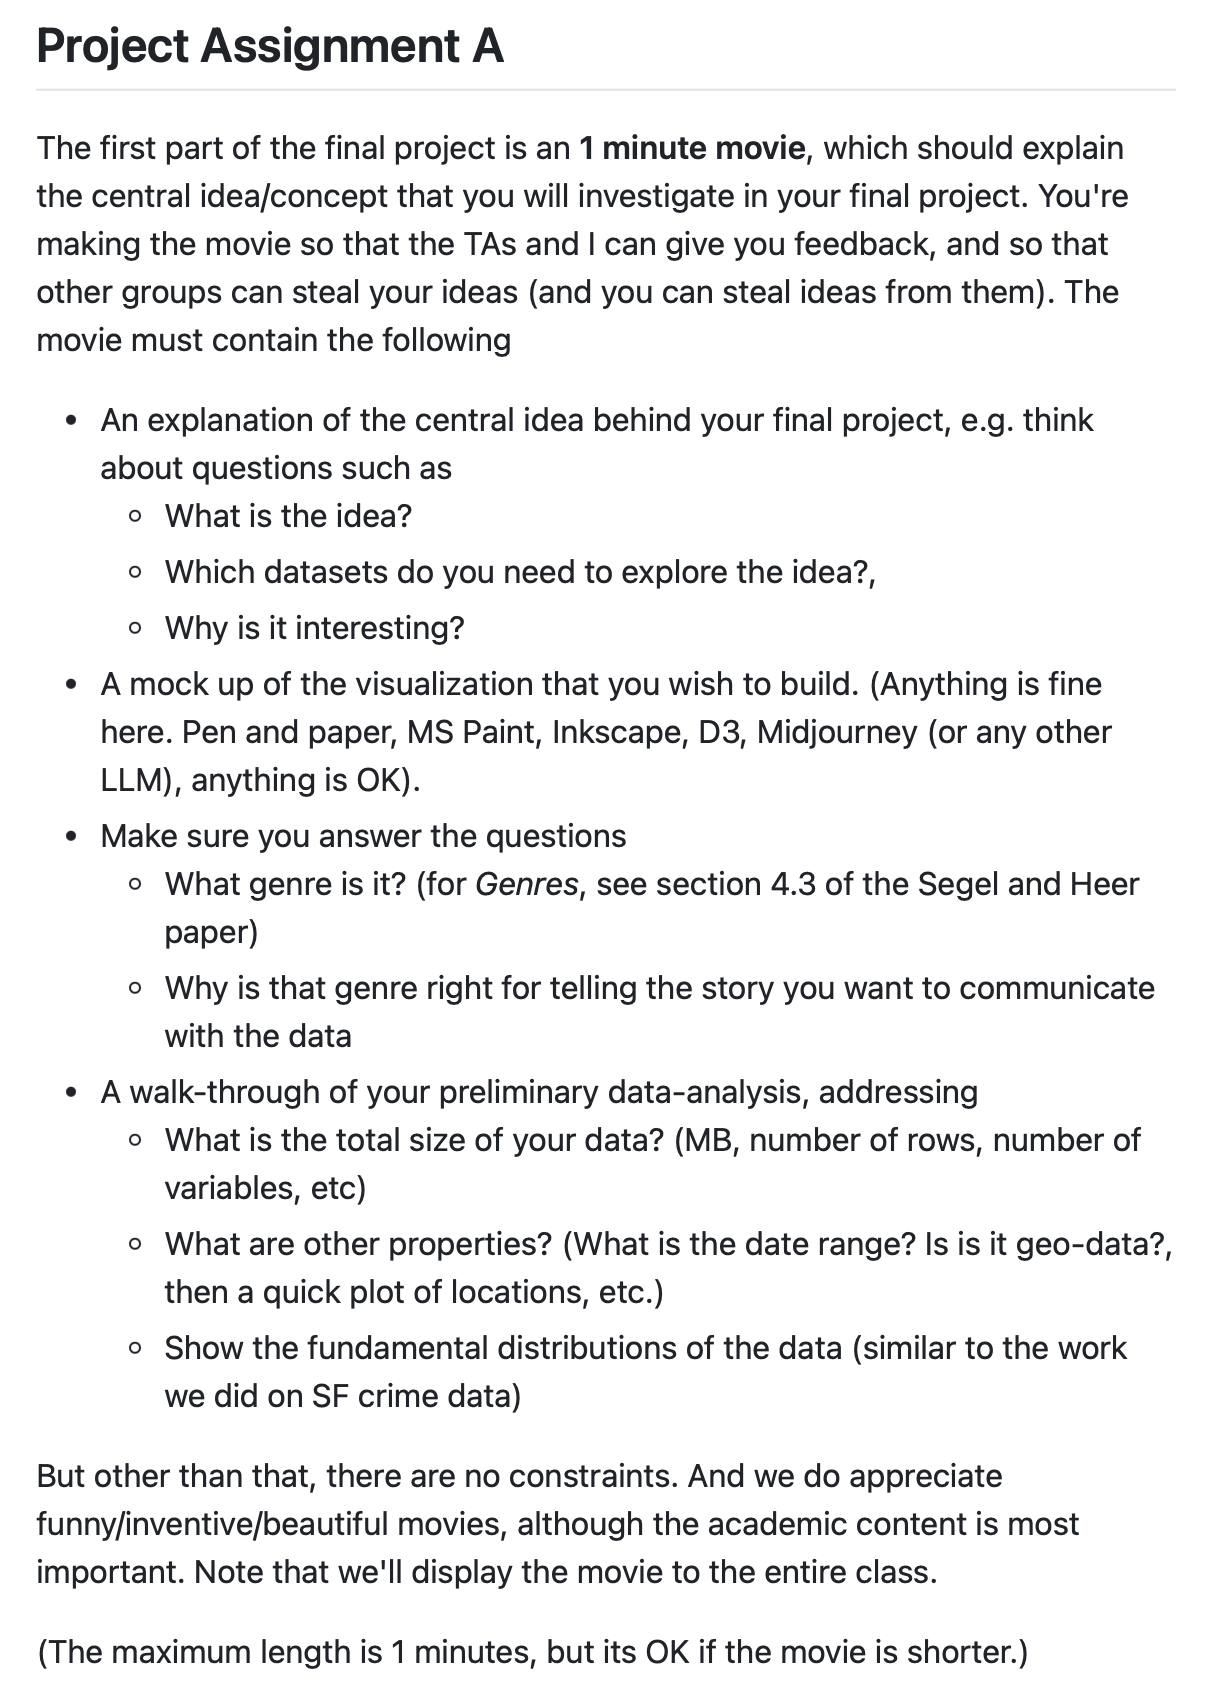

In [2]:
import pandas as pd

**The central idea behind our final project**
The idea is to analyze how efficiently people can commute in London while considering their environmental footprint and how these factors match up with their actual commuting choices.

**Dataset Needed:**
The dataset below with 36 variables on 81,086 trips, covering different transport modes, costs, durations, personal demographics, and environmental impacts.

In [3]:
df = pd.read_csv("dataset.csv")
df

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,pt_n_interchanges,dur_driving,cost_transit,cost_driving_total,cost_driving_fuel,cost_driving_con_charge,driving_traffic_percent
0,0,0,0,0,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.052222,1.5,0.14,0.14,0.0,0.111702
1,1,0,0,1,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.059444,1.5,0.15,0.15,0.0,0.112150
2,2,0,0,2,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.236667,1.5,0.79,0.79,0.0,0.203052
3,3,0,0,3,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.233333,1.5,0.78,0.78,0.0,0.160714
4,4,0,1,2,drive,HBO,Petrol_Car,dis,1.0,1,...,0.000000,0.000000,0.000000,0,0.229167,1.5,0.78,0.78,0.0,0.130909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,81081,17615,0,0,drive,HBO,Average_Car,full,1.0,3,...,0.216667,0.197222,0.019444,2,0.859722,4.3,2.48,2.48,0.0,0.402262
81082,81082,17615,0,2,drive,NHBO,Average_Car,full,1.0,3,...,0.183333,0.160278,0.023056,2,0.925833,4.3,2.53,2.53,0.0,0.503750
81083,81083,17615,0,3,drive,HBO,Average_Car,full,1.0,3,...,0.000000,0.000000,0.000000,0,0.112500,1.5,0.32,0.32,0.0,0.234568
81084,81084,17615,1,0,pt,HBW,Average_Car,full,1.0,3,...,0.250000,0.230556,0.019444,2,1.121944,4.4,12.88,2.38,10.5,0.760832


# **Commute Efficiency, Environmental Impact, and Preference**

**Objective:** Evaluate how commuters' preferences for transport modes align with the efficiency and environmental impact of those modes.

**Analysis:**
- *Efficiency and Environmental Scoring:* Develop a composite score that integrates efficiency (considering duration, cost) with environmental impact (based on fuel type and traffic congestion).
- *Preference Correlation:* Analyze how this composite score correlates with the actual choices commuters make, considering the frequency of use for each mode.



**Why is this interesting**
This is compelling because it touches on everyday decisions that affect personal time, finances, urban planning, and the environment. Understanding these dynamics can help in promoting sustainable transport policies, improving city infrastructure, and advocating for changes in commuter behavior.

**Visualization Mock-up:**
A mock-up for the visualization can be a multi-layered interactive dashboard that combines a map of London with filters for demographics and transport modes, and displays efficiency and environmental scores. It can include:
1. Map Visualization: A base map showing London with color-coded routes representing different efficiency and environmental impact levels.
2. Mode Selection: Buttons to filter by transport mode (walking, cycling, public transport, driving).
3. Demographic Filters: Sliders or dropdowns for filtering by age, gender, and car ownership.
4. Scoring Display: A sidebar displaying efficiency and environmental impact scores, dynamically updating based on the selected filters.
5. Preference Indicators: Graphs beside the map showing the popularity of each mode against its efficiency and environmental score.

**Genre of Visualization:**
The genre of this visualization is an "Interactive Dashboard," as it allows for active engagement from users to explore the data from multiple perspectives. It falls under the category of "Data Exploration," encouraging the user to form their own hypotheses and conclusions.

**Why the Genre Fits the Story:**
An interactive dashboard is ideal for this story because it can accommodate the complexity and multi-dimensionality of the data. It allows users to:

- See the big picture of transportation in London.
- Drill down to understand individual commuting decisions.
- Explore hypothetical scenarios by adjusting parameters (e.g., what if - more people cycled?).
- Encourage discovery and personalized insights, which is more engaging than static visualizations.

In [4]:
print(len(df.columns))

36


**Preliminary data analysis**

The datasets file size is almost 15 MBs, has 81086 rows and 36 columns.

The date range of the survey year column is from 2012 to 2015

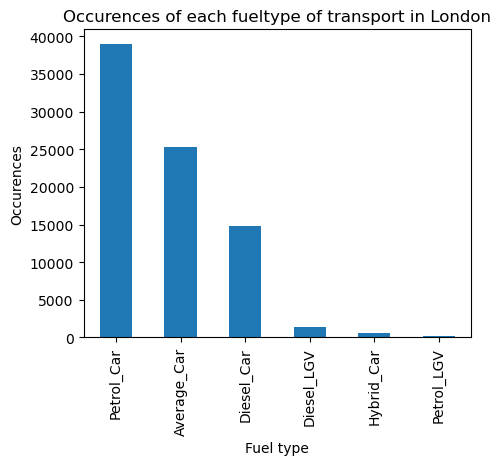

In [5]:
import matplotlib.pyplot as plt
fueltype_count = df["fueltype"].value_counts()
plt.figure(figsize=(5,4))
fueltype_count.plot(kind="bar")
plt.xlabel("Fuel type")
plt.ylabel("Occurences")
plt.title("Occurences of each fueltype of transport in London")
plt.show()

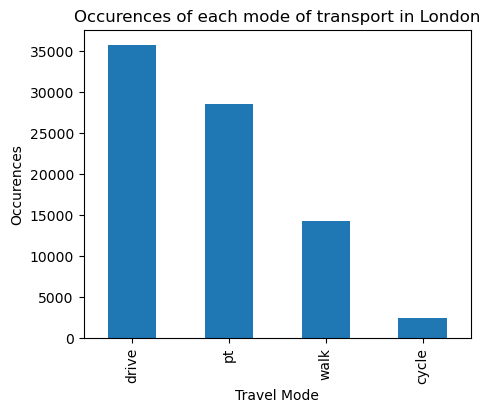

In [6]:
travelmode_count = df["travel_mode"].value_counts()
plt.figure(figsize=(5,4))
travelmode_count.plot(kind="bar")
plt.xlabel("Travel Mode")
plt.ylabel("Occurences")
plt.title("Occurences of each mode of transport in London")
plt.show()
# drive is cars, pt is public transport, walk is walking and cycle is a bike

Year with most trips:  2013 

Year with least trips:  2012 



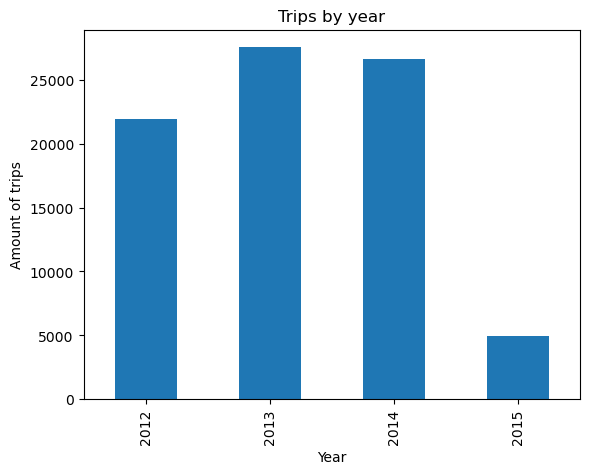

In [7]:
year_counts = df["travel_year"].value_counts()
print("Year with most trips: ", year_counts.index[0],"\n")
print("Year with least trips: ", year_counts.index[-2], "\n")

sorted_year_count = year_counts.sort_index()
plt.figure()
sorted_year_count.plot(kind="bar")
plt.title("Trips by year")
plt.xlabel("Year")
plt.ylabel("Amount of trips")
plt.show()

In [8]:
df["Date"] = df["travel_date"].astype(str) + "/" + df["travel_month"].astype(str) + "/" + df["travel_year"].astype(str)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)
print(df["Date"])

0       2012-04-01
1       2012-04-01
2       2012-04-01
3       2012-04-01
4       2012-04-01
           ...    
81081   2015-03-31
81082   2015-03-31
81083   2015-03-31
81084   2015-03-31
81085   2015-03-31
Name: Date, Length: 81086, dtype: datetime64[ns]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, Legend,RangeTool
from bokeh.palettes import Spectral11, Category20
from bokeh.transform import linear_cmap, jitter
from bokeh.io import output_notebook
from bokeh.layouts import column

df_grouped = df.groupby(by=["Date", "fueltype"]).size()

# Group by category and year and count the number of incidents
category_grouped_counts = df.groupby(['fueltype', 'Date']).size().reset_index(name='Counts')

# Calculate the total counts for each category over the entire period
total_counts_by_category = category_grouped_counts.groupby('fueltype')['Counts'].sum().reset_index(name='TotalCounts')

# Merge the total counts back to the yearly data
merged_data = category_grouped_counts.merge(total_counts_by_category, on='fueltype')

# Normalize the data by dividing the yearly counts by total counts for each category
merged_data['Normalized'] = merged_data['Counts'] / merged_data['TotalCounts']

# Pivot the table to have years as rows and categories as columns
normalized_pivot = merged_data.pivot(index='Date', columns='fueltype', values='Counts').fillna(0)
sorted_categories = normalized_pivot.reindex(sorted(normalized_pivot.columns), axis=1)

dates = sorted_categories.index.values

sorted_categories.reset_index(inplace = True)


p = figure(height=300, width=800, tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[0], dates[1081]))

fueltypes = df["fueltype"].unique()
type_to_color = {type: Category20[len(fueltypes)][i] for i, type in enumerate(fueltypes)}
items = []
lines = {}

for i,type in enumerate(fueltypes):
    source = ColumnDataSource(data=dict(date=dates, count=sorted_categories[type]))
    lines = p.line('date', 'count', source=source, line_color=type_to_color[type])
    items.append((type, [lines]))

p.yaxis.axis_label = 'Incidents'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'count', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)

legend = Legend(items=items, location=[0,-30]) ## figure where to add it
p.add_layout(legend, 'right') ## figure where to add it
### if you read the guide, it will make sense
p.legend.click_policy="mute"
output_notebook()
show(column(p, select))

Loading BokehJS ...

In [21]:
df["total_dur"] = df["dur_walking"] + df["dur_cycling"] + df["dur_pt_total"] + df["dur_driving"]
print(df.total_dur)
df["total_cost"] = df.cost_transit + df.cost_driving_total
print(df.total_cost)

0        0.511944
1        0.478333
2        2.042500
3        2.120833
4        2.014167
           ...   
81081    6.669722
81082    6.082222
81083    1.070000
81084    6.329722
81085    6.111111
Name: total_dur, Length: 81086, dtype: float64
0         1.64
1         1.65
2         2.29
3         2.28
4         2.28
         ...  
81081     6.78
81082     6.83
81083     1.82
81084    17.28
81085     8.28
Name: total_cost, Length: 81086, dtype: float64


In [28]:
household_modes = df.groupby(by=['household_id','travel_mode']).size().reset_index(name='Counts')
household_counts = household_modes.groupby('travel_mode')['Counts'].sum().reset_index(name='TotalCounts')
print(household_counts)

       household_id travel_mode  Counts
0                 0       drive      10
1                 1       drive       4
2                 2       drive       3
3                 3          pt       1
4                 4          pt       2
...             ...         ...     ...
25576         17612        walk       1
25577         17613          pt       2
25578         17614          pt       1
25579         17615       drive       3
25580         17615          pt       2

[25581 rows x 3 columns]
  travel_mode  TotalCounts
0       cycle         2405
1       drive        35808
2          pt        28605
3        walk        14268


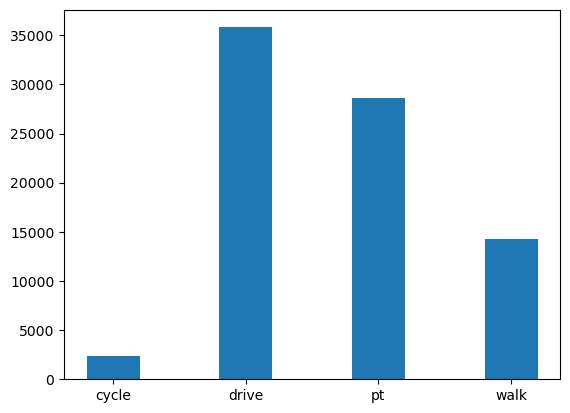

In [35]:
plt.bar(household_counts.travel_mode,household_counts.TotalCounts,width=0.4)
plt.show()

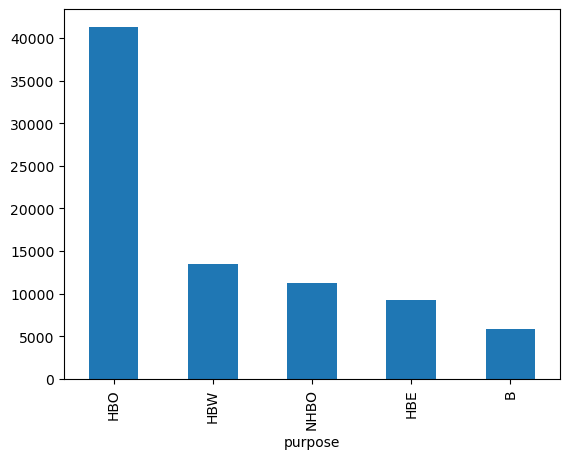

In [42]:
purpose_counts = df["purpose"].value_counts()
purpose_counts.plot(kind="bar")
plt.show()